# Autoprofiler demo: SF Housing

In [1]:
import pandas as pd
import numpy as np

## What is AutoProfiler?
AutoProfiler shows you data _profiles_ for any pandas dataframe in the left side bar of Jupyter. Whenever you load or update a dataframe, autoprofiler will show you information like distributions, common values, missing values etc. 

__To install and use locally: `pip install -U digautoprofiler`__

## This demo
This dataset is a sample of Bay Area rents from 2000-2018 gathered from [this site](https://www.katepennington.org/data). Try exploring the dataset and open **Autoprofiler** in the left panel to see profiling charts!

If this demo is running in jupyterlite, we have to read the dataframe and install dependencies in a slighly different way, if not we can just load it normally:

In [2]:
import sys

if sys.platform == "emscripten":
    # running in jupyterlite, so we need to manually install dependencies
    import piplite
    await piplite.install('altair')
    await piplite.install('digautoprofiler')

    # read the data for jupyter lite
    import pyodide
    URL = "https://raw.githubusercontent.com/cmudig/AutoProfiler/main/examples/df_housing_sample.csv"
    df_housing = pd.read_csv(pyodide.http.open_url(URL))
else:
    df_housing = pd.read_csv("./df_housing_sample.csv")

The profile charts will update whenever the data updates, including changing the type:

In [3]:
df_housing["date"] = pd.to_datetime(df_housing["date"], format="%Y%m%d")

Or whenever a new dataframe is created:

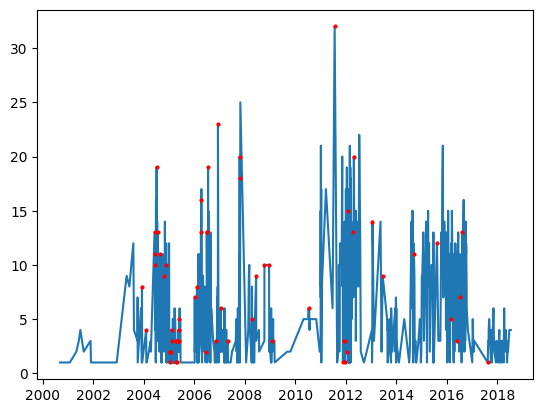

In [30]:
# Generated by AutoProfiler
alpha = 1.4826 #for MAD to be a consistent estimator of SD, we use 1.4826 for guassian 
k = 7
    
col_count = df_housing["date"].value_counts().reset_index()
col_count.columns = ["date", "counts"]
col_count = col_count.sort_values(by=["date"])
counts = col_count["counts"]
rolling_median = counts.rolling(window=k, center=True).median() #for each window calculate a mean
MAD = lambda x: np.median(np.abs(x - np.median(x))) #MAD is calculated by taking the median(|point - median(window)|)
rolling_MAD = counts.rolling(window=k, center=True).apply(MAD)
threshold = 3 * alpha * rolling_MAD #use 3 standard deviations
outlier = np.abs(counts - rolling_median) > threshold
outlier_idx = outlier[outlier].index.tolist()
    
dt_out = list(col_count[col_count.index.isin(outlier_idx)]["date"])
datetime_outliers = df_housing.loc[df_housing["date"].isin(dt_out)] #shows all rows with time such that the count is an outlier -- what to call?
dt = col_count[col_count.index.isin(outlier_idx)] # shows all times that have outliers
    

from matplotlib import pyplot
pyplot.plot(col_count["date"],col_count["counts"])
pyplot.plot(dt["date"],dt["counts"],"ro",ms=2)
pyplot.show()

In [ ]:
expensive_rents = df_housing[df_housing["price"] > 5000]

Try different pandas commands to...
- See how your dataframes profile changes after a command
- Compare dataframes
- See most common values, distributions, cardinality, null values and more!

In [12]:
def hampel(col, k=7):
    
    #https://stackoverflow.com/questions/46819260/filtering-outliers-how-to-make-median-based-hampel-function-faster
    #https://blogs.sas.com/content/iml/2021/06/01/hampel-filter-robust-outliers.html
    
    col
    alpha = 1.4826 #for MAD to be a consistent estimator of SD, we use 1.4826 for guassian 
    rolling_median = col.rolling(window=k, center=True).median() #for each window calculate a mean
    MAD = lambda x: np.median(np.abs(x - np.median(x))) #MAD is calculated by taking the median(|point - median(window)|)
    rolling_MAD = col.rolling(window=k, center=True).apply(MAD)
    threshold = 3 * alpha * rolling_MAD #use 3 standard deviations
    outlier = np.abs(col - rolling_median) > threshold
    outlier_idx = outlier[outlier].index.tolist()
    return outlier_idx


